### TensorFlow 2.0 선택

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


# RNN Basics

RNN의 API의 사용법과, input shape, output shape 등의 기본적인 것들에 대해서 알아봅니다.

In [2]:
## library import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.1.0-rc1
2.2.4-tf


## Preparing Dataset

In [0]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

![image](https://cloud.githubusercontent.com/assets/901975/23348727/cc981856-fce7-11e6-83ea-4b187473466b.png)

In [4]:
x_data = np.array([[h]], dtype=np.float32)

hidden_size = 2

rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True,
                       return_state=True) # layers.SimpleRNNCell + layers.RNN

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[ 0.5801952  -0.69422954]]], shape: (1, 1, 2)
states: [[ 0.5801952  -0.69422954]], shape: (1, 2)


## Unfolding to n sequences

![image](https://cloud.githubusercontent.com/assets/901975/23383634/649efd0a-fd82-11e6-925d-8041242743b0.png)

In [5]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=False, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[ 0.9295044 -0.5030784]], shape: (1, 2) 

states: [[ 0.9295044 -0.5030784]], shape: (1, 2)


## Batching input

![image](https://cloud.githubusercontent.com/assets/901975/23383681/9943a9fc-fd82-11e6-8121-bd187994e249.png)

In [6]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[-0.12339026 -0.03896552]
  [-0.1732517   0.70685464]
  [ 0.6559206  -0.81908226]
  [ 0.3103046   0.47716448]
  [ 0.47327626  0.1348377 ]]

 [[-0.2949777   0.70170593]
  [ 0.783186   -0.21580921]
  [ 0.06112177 -0.03986736]
  [ 0.62011576 -0.3572405 ]
  [ 0.24670309  0.06116755]]

 [[ 0.65027934 -0.40223438]
  [ 0.22852036  0.11140475]
  [-0.50181645  0.6715156 ]
  [ 0.03390991  0.10311256]
  [ 0.61663103 -0.4770484 ]]], shape: (3, 5, 2) 

states: [[ 0.47327626  0.1348377 ]
 [ 0.24670309  0.06116755]
 [ 0.61663103 -0.4770484 ]], shape: (3, 2)


## No return sequences

In [7]:
rnn = layers.SimpleRNN(units=2, return_sequences=False, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[ 0.6953323   0.4765697 ]
 [ 0.8293871   0.09941916]
 [ 0.02088142 -0.7193507 ]], shape: (3, 2) 

states: [[ 0.6953323   0.4765697 ]
 [ 0.8293871   0.09941916]
 [ 0.02088142 -0.7193507 ]], shape: (3, 2)


## No return state

In [8]:
rnn = layers.SimpleRNN(units=2, return_sequences=False, return_state=False) 

outputs = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.2140656   0.29768008]
 [-0.329746    0.3454261 ]
 [ 0.26782757 -0.85389876]], shape: (3, 2) 



## GRU

In [9]:
rnn = layers.GRU(units=2, return_sequences=False, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[0.20319875 0.34353408]
 [0.55515546 0.37085268]
 [0.41199058 0.42560852]], shape: (3, 2) 

states: [[0.20319875 0.34353408]
 [0.55515546 0.37085268]
 [0.41199058 0.42560852]], shape: (3, 2)


## LSTM

In [10]:
rnn = layers.LSTM(units=2, return_sequences=False, return_state=True)    
outputs, h_states, c_states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('hidden_states: {}, shape: {}'.format(h_states, h_states.shape))
print('cell_states: {}, shape: {}'.format(c_states, c_states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.22555089  0.13541532]
 [-0.35530257  0.2533375 ]
 [-0.23677137  0.2956309 ]], shape: (3, 2) 

hidden_states: [[-0.22555089  0.13541532]
 [-0.35530257  0.2533375 ]
 [-0.23677137  0.2956309 ]], shape: (3, 2)
cell_states: [[-0.5518913   0.22262482]
 [-0.6186999   0.5484701 ]
 [-0.3948229   0.627259  ]], shape: (3, 2)


## Stacked RNN

In [11]:
model = keras.Sequential()
model.add(layers.SimpleRNN(2, return_sequences=True, input_shape=(5,4)))
model.add(layers.SimpleRNN(2, return_sequences=True))
model.add(layers.SimpleRNN(2, return_sequences=True))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 5, 2)              14        
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 5, 2)              10        
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 5, 2)              10        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


# RNN을 이용하여 MNIST Classification 학습하기 
  

MNIST Image를 한 line씩 RNN에 입력하여 classification을 하는 실습을 해보겠습니다.

In [0]:
## HyperParameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

In [0]:
## Data 준비
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [14]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

n_train = train_images.shape[0]
n_test = test_images.shape[0]
print(train_images.shape, test_images.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size).repeat()

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(units=128, return_sequences=False, input_shape=(28,28)))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [17]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [0]:
## model compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
## Training
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

In [23]:
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600.0 steps, validate for 100.0 steps
Epoch 1/15
600/600 [==============================] - 6s 10ms/step - loss: 0.4724 - accuracy: 0.8465 - val_loss: 0.1512 - val_accuracy: 0.9531
Epoch 2/15
600/600 [==============================] - 4s 7ms/step - loss: 0.1432 - accuracy: 0.9569 - val_loss: 0.1168 - val_accuracy: 0.9636
Epoch 3/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0970 - accuracy: 0.9696 - val_loss: 0.0847 - val_accuracy: 0.9735
Epoch 4/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0743 - accuracy: 0.9775 - val_loss: 0.0685 - val_accuracy: 0.9788
Epoch 5/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.0713 - val_accuracy: 0.9774
Epoch 6/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0507 - accuracy: 0.9848 - val_loss: 0.0600 - val_accuracy: 0.9811
Epoch 7/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0436 - accuracy: 0.9868

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

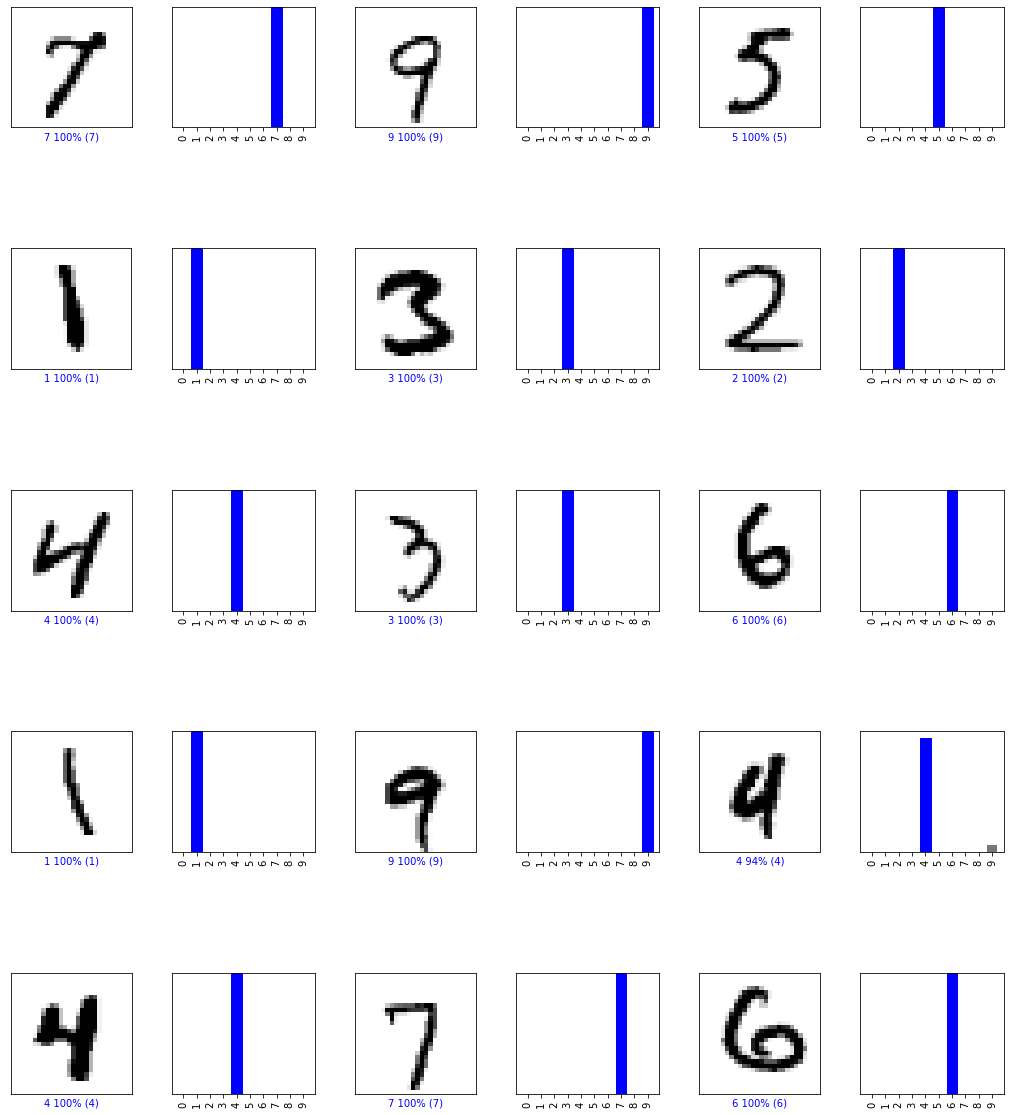

In [25]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Stock Prediction with RNN  
RNN을 이용한 간단한 주식 예측 모델을 학습해보겠습니다.

In [0]:
## Hyper Parameters
seq_length = 7
data_dim = 5
hidden_size = 10
output_dim = 1
learning_rate = 0.001
training_epochs = 500
batch_size = 25

In [0]:
## Data Preprocessing
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [31]:
## Google Drive 동기화
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## Data loading
# Open, High, Low, Volume, Close
xy = np.loadtxt('/content/drive/My Drive/mobis_dl_practice/data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy).astype(np.float32)
x = xy
y = xy[:, [-1]]  # Close as label

In [33]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.1375105e-01 2.0817982e-01 1.9179183e-01 4.6607511e-04 1.9209240e-01]
 [1.9393504e-01 2.0364192e-01 2.0866457e-01 2.9846733e-03 1.9655156e-01]
 [2.1051645e-01 2.0528941e-01 2.0355874e-01 2.5992651e-04 1.8774973e-01]
 [1.8667877e-01 2.0948057e-01 2.0878184e-01 0.0000000e+00 2.1744815e-01]
 [3.0697387e-01 3.1463414e-01 2.1899366e-01 1.2476472e-02 2.1698189e-01]
 [2.1914211e-01 2.6390722e-01 2.2468640e-01 4.5632339e-01 2.2496748e-01]
 [2.3312993e-01 2.3641916e-01 1.6268273e-01 5.7017118e-01 1.4744274e-01]] -> [0.13289961]
[[1.9393504e-01 2.0364192e-01 2.0866457e-01 2.9846733e-03 1.9655156e-01]
 [2.1051645e-01 2.0528941e-01 2.0355874e-01 2.5992651e-04 1.8774973e-01]
 [1.8667877e-01 2.0948057e-01 2.0878184e-01 0.0000000e+00 2.1744815e-01]
 [3.0697387e-01 3.1463414e-01 2.1899366e-01 1.2476472e-02 2.1698189e-01]
 [2.1914211e-01 2.6390722e-01 2.2468640e-01 4.5632339e-01 2.2496748e-01]
 [2.3312993e-01 2.3641916e-01 1.6268273e-01 5.7017118e-01 1.4744274e-01]
 [1.3431200e-01 1.5175878e-01 1.16

In [34]:
## train/test split
train_size = int(len(dataY) * 0.7 + 18)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])
print(trainX.shape, trainY.shape)
print(testX.shape, testX.shape)

(525, 7, 5) (525, 1)
(200, 7, 5) (200, 7, 5)


In [0]:
## Make a Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((testX, testY)).prefetch(
                buffer_size=batch_size).batch(batch_size)

In [0]:
## Make a Model
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=hidden_size, return_sequences=True,
                                     input_shape=(trainX.shape[1],trainX.shape[2])))
    model.add(keras.layers.LSTM(units=hidden_size))
    model.add(keras.layers.Dense(units=output_dim))
    return model

In [37]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 7, 10)             640       
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [0]:
## Loss function & Optimizer
def rmse_opt(learning_rate):
    return keras.optimizers.RMSprop(learning_rate)

model.compile(optimizer=rmse_opt(learning_rate),
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])  

In [39]:
## Training
model.fit(train_dataset, epochs=training_epochs,
          steps_per_epoch=trainX.shape[0]//batch_size,
          validation_data=test_dataset,
          validation_steps=testX.shape[0]//batch_size)

Train for 21 steps, validate for 8 steps
Epoch 1/500
21/21 [==============================] - 3s 156ms/step - loss: 0.1177 - root_mean_squared_error: 0.3430 - val_loss: 0.2206 - val_root_mean_squared_error: 0.4697
Epoch 2/500
21/21 [==============================] - 0s 11ms/step - loss: 0.0233 - root_mean_squared_error: 0.1526 - val_loss: 0.0507 - val_root_mean_squared_error: 0.2251
Epoch 3/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0084 - root_mean_squared_error: 0.0918 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 4/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 5/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0030 - root_mean_squared_error: 0.0552 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 6/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0032 - root_mean_squar

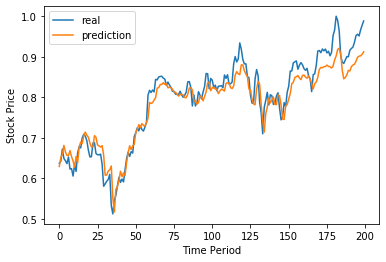

In [40]:
## Checking the Result
prediction = model.predict(test_dataset)

plt.plot(testY)
plt.plot(prediction)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend(['real', 'prediction'])
plt.show()